In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Nov  5 19:37:22 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    24W / 300W |      0MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install ultralytics

# Install YOLOv8

In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()

# Train YOLOv8 Model

In [ ]:
!pip install roboflow

In [ ]:
from roboflow import Roboflow

In [ ]:
rf = Roboflow(api_key="B0gU8fg7HPtyAhhTOtyG")
project = rf.workspace("viad-optics-senior-design").project("senior-design-viad")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.207, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Senior-Design-VIAD-1 in yolov8:: 100%|██████████| 31290/31290 [00:08<00:00, 3567.02it/s]


In [ ]:
!yolo task=detect mode=train model=yolov8x.pt data={dataset.location}/data.yaml epochs=20 imgsz=640

100% 131M/131M [00:00<00:00, 200MB/s]
Ultralytics YOLOv8.0.207 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/Senior-Design-VIAD-1/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina

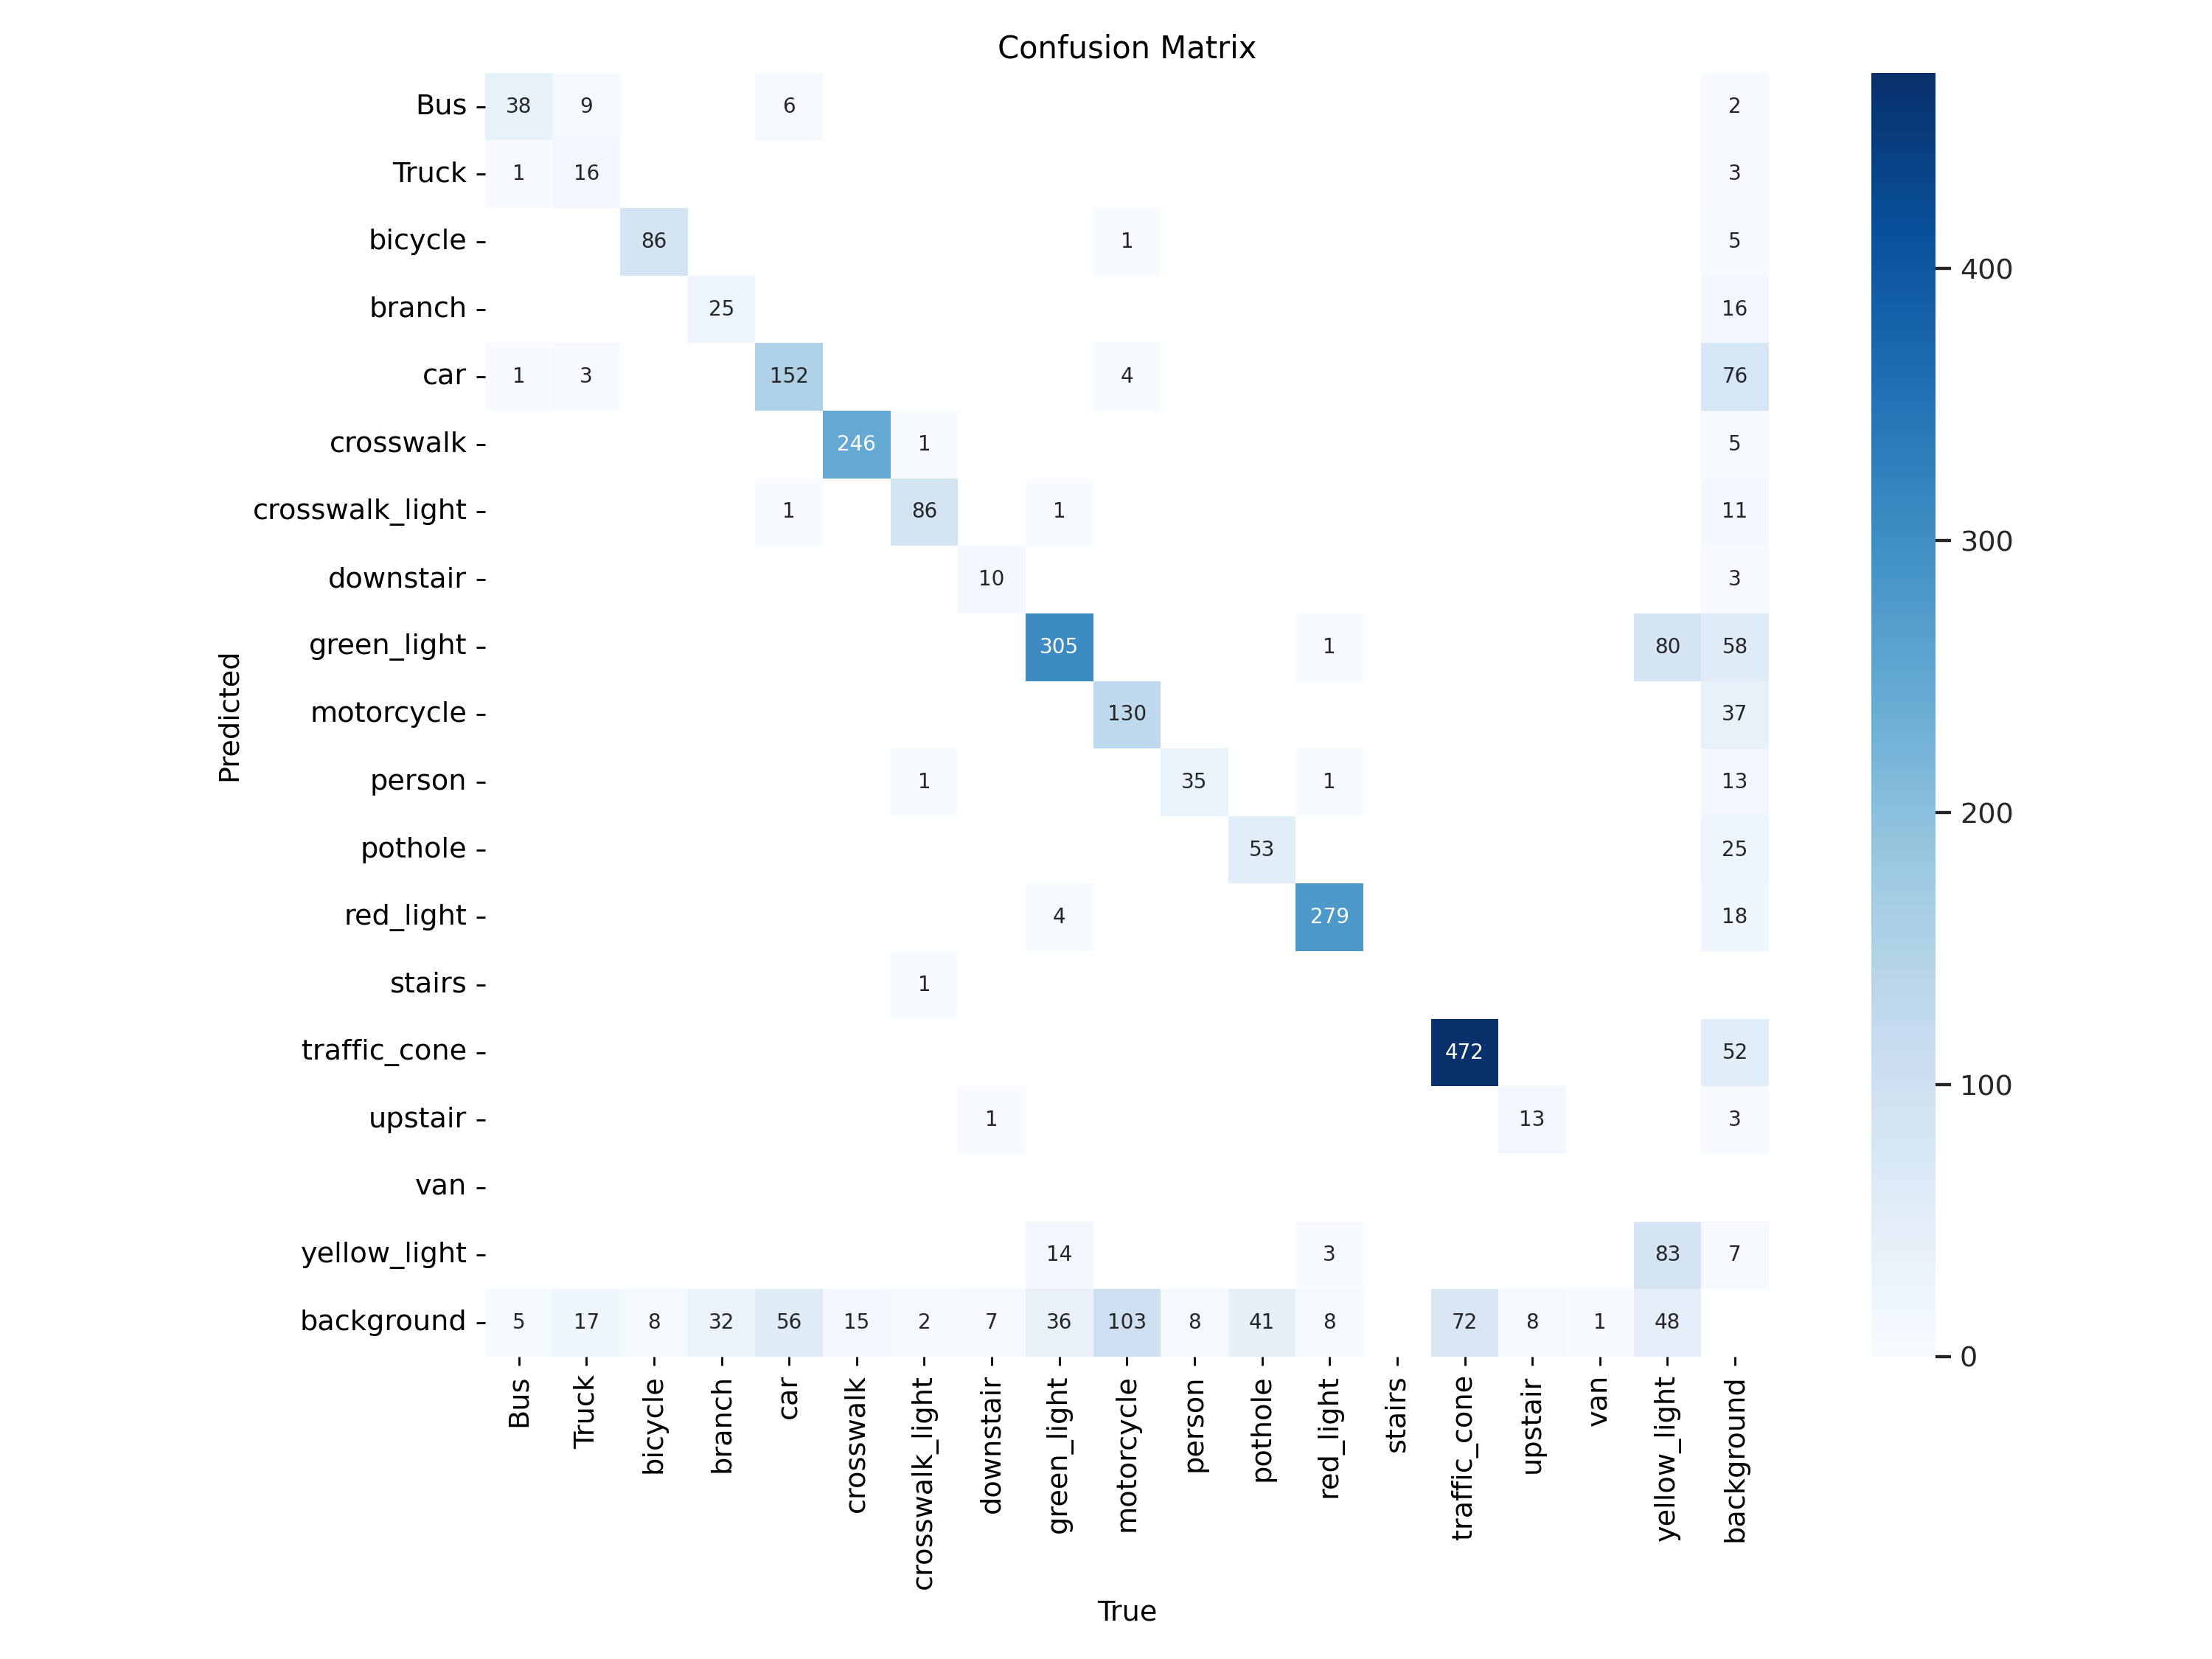

In [ ]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=1200)

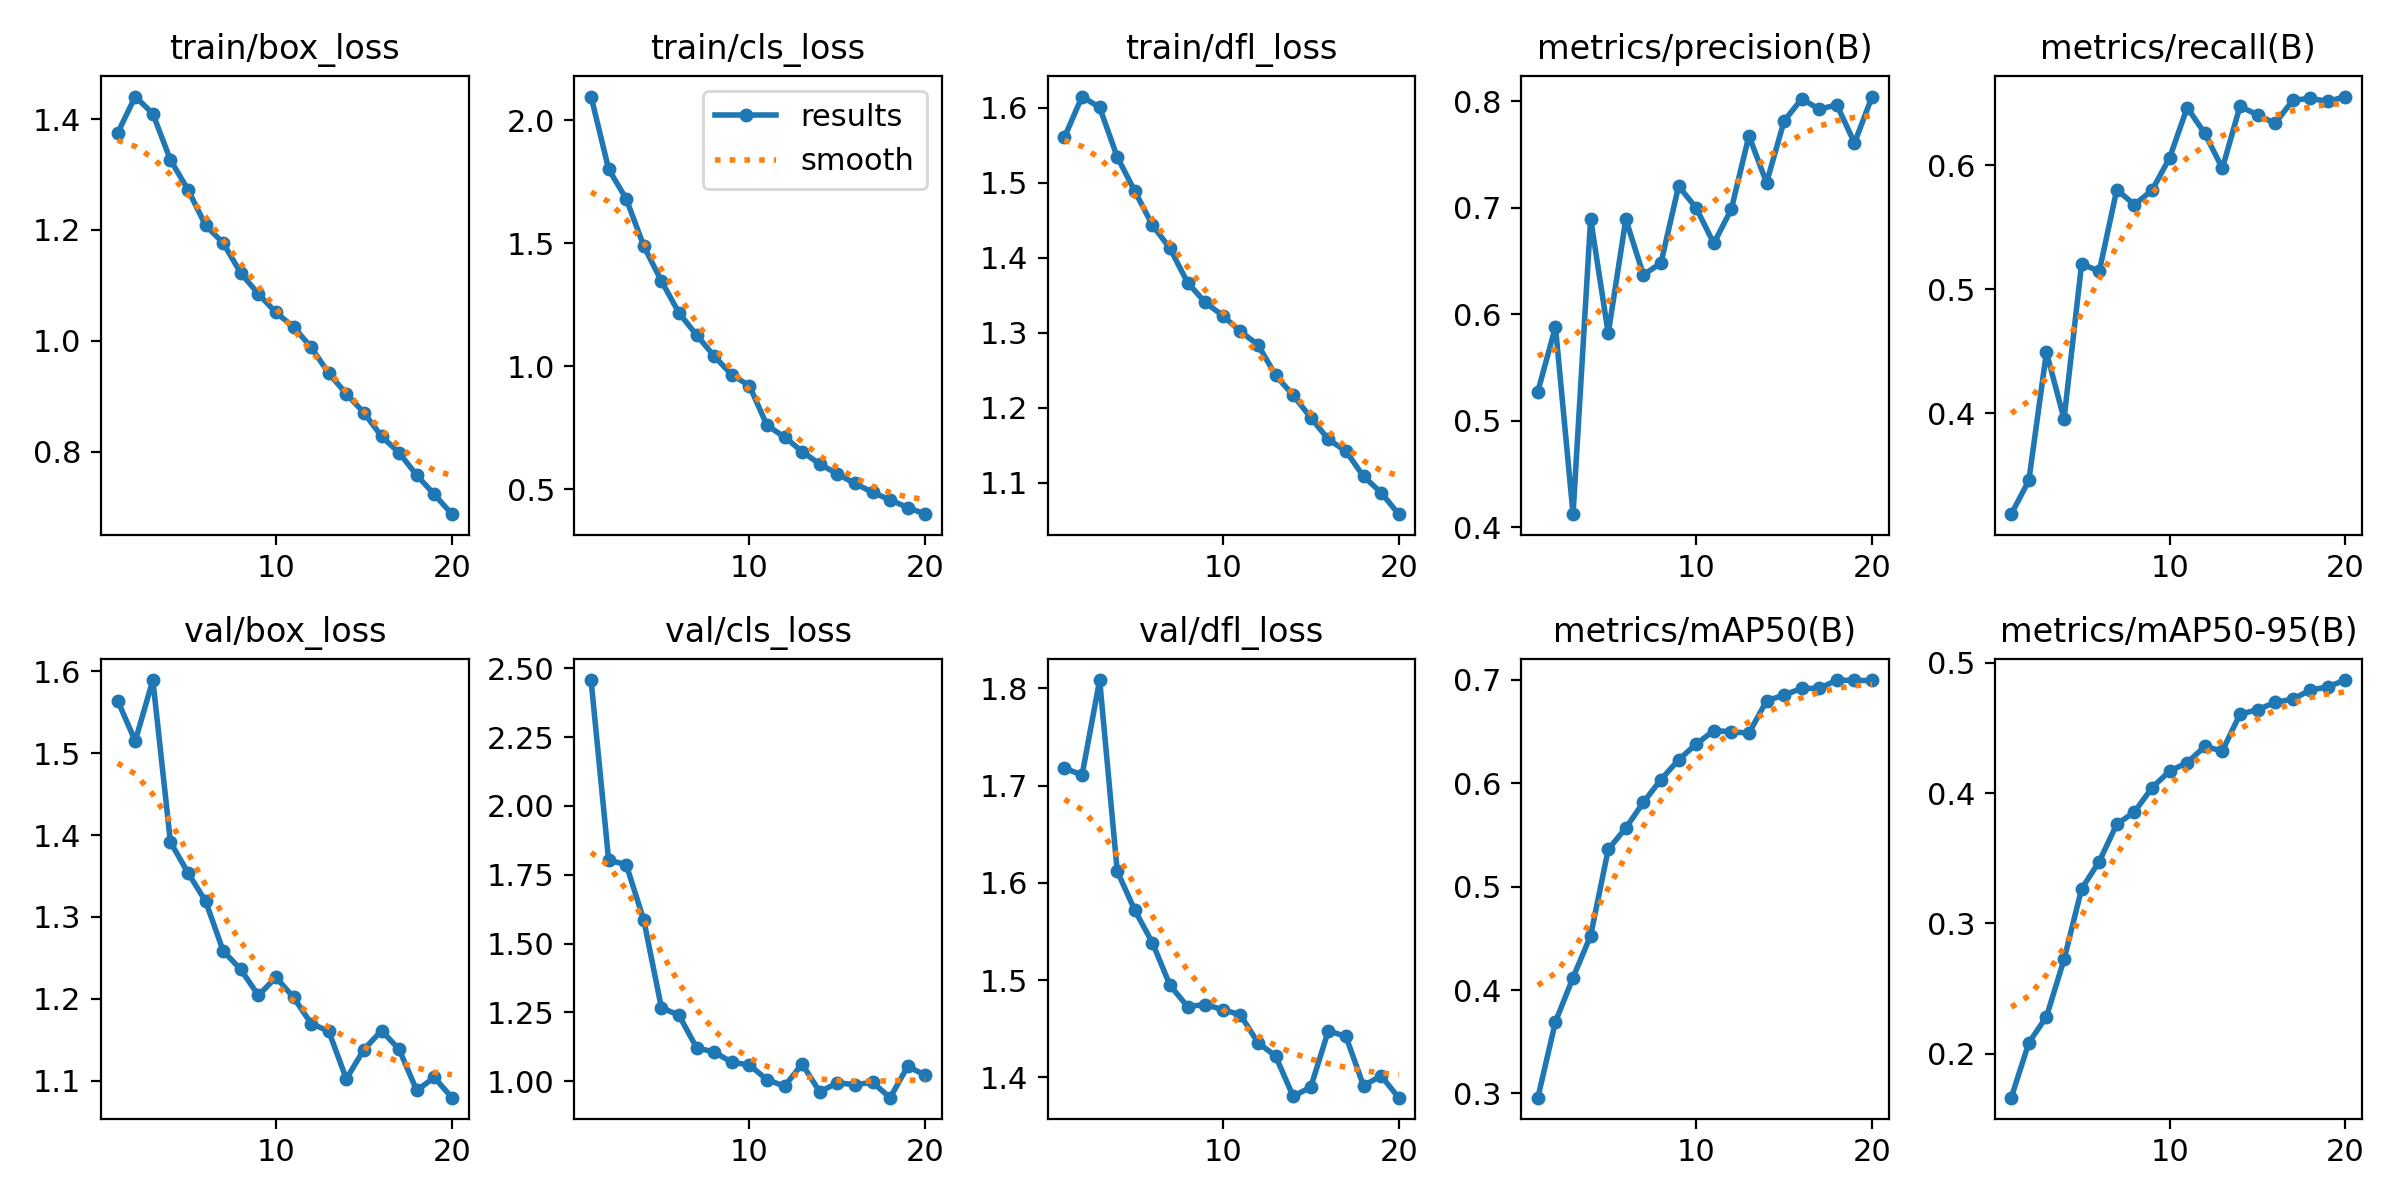

In [ ]:
Image(filename=f'/content/runs/detect/train/results.png', width=1200)

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.207 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 268 layers, 68140902 parameters, 0 gradients, 257.5 GFLOPs
val: Scanning /content/Senior-Design-VIAD-1/valid/labels.cache... 1523 images, 50 backgrounds, 0 corrupt: 100% 1523/1523 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/Senior-Design-VIAD-1/valid/images/4_z8126b7d060d92d74599e0618_f105bec8d65461b60_d20170228_m031732_c001_v0001038_t0052_png.rf.d7128e3604014538b809ce2417f1ad4f.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /content/Senior-Design-VIAD-1/valid/images/4_z8126b7d060d92d74599e0618_f105bec8d654623bd_d20170228_m032421_c001_v0001038_t0052_png.rf.86eeb8b700be18a7356cc46bae2be8ce.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/Senior-Design-VIAD-1/valid/images/4_z8126b7d060d92d74599e0618_f109cae5016f22c00_d20170225_m202920_c001_v0001038_t0018_png.rf.3047972ff92da9765c8cbf16eb78b0d2.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /content/Senior-Des

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt conf=0.5 source={dataset.location}/test.mp4

WARNING ⚠️ 'data' is missing. Using default 'data=coco8.yaml'.
Ultralytics YOLOv8.0.207 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 268 layers, 68140902 parameters, 0 gradients, 257.5 GFLOPs

Dataset 'coco8.yaml' images not found ⚠️, missing path '/content/datasets/coco8/images/val'
100% 433k/433k [00:00<00:00, 30.8MB/s]
Unzipping /content/datasets/coco8.zip to /content/datasets/coco8...: 100% 25/25 [00:00<00:00, 4565.18file/s]
Dataset download success ✅ (1.1s), saved to /content/datasets

val: Scanning /content/datasets/coco8/labels/val... 4 images, 0 backgrounds, 0 corrupt: 100% 4/4 [00:00<00:00, 603.82it/s]
val: New cache created: /content/datasets/coco8/labels/val.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0% 0/1 [00:00<?, ?it/s]
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/d

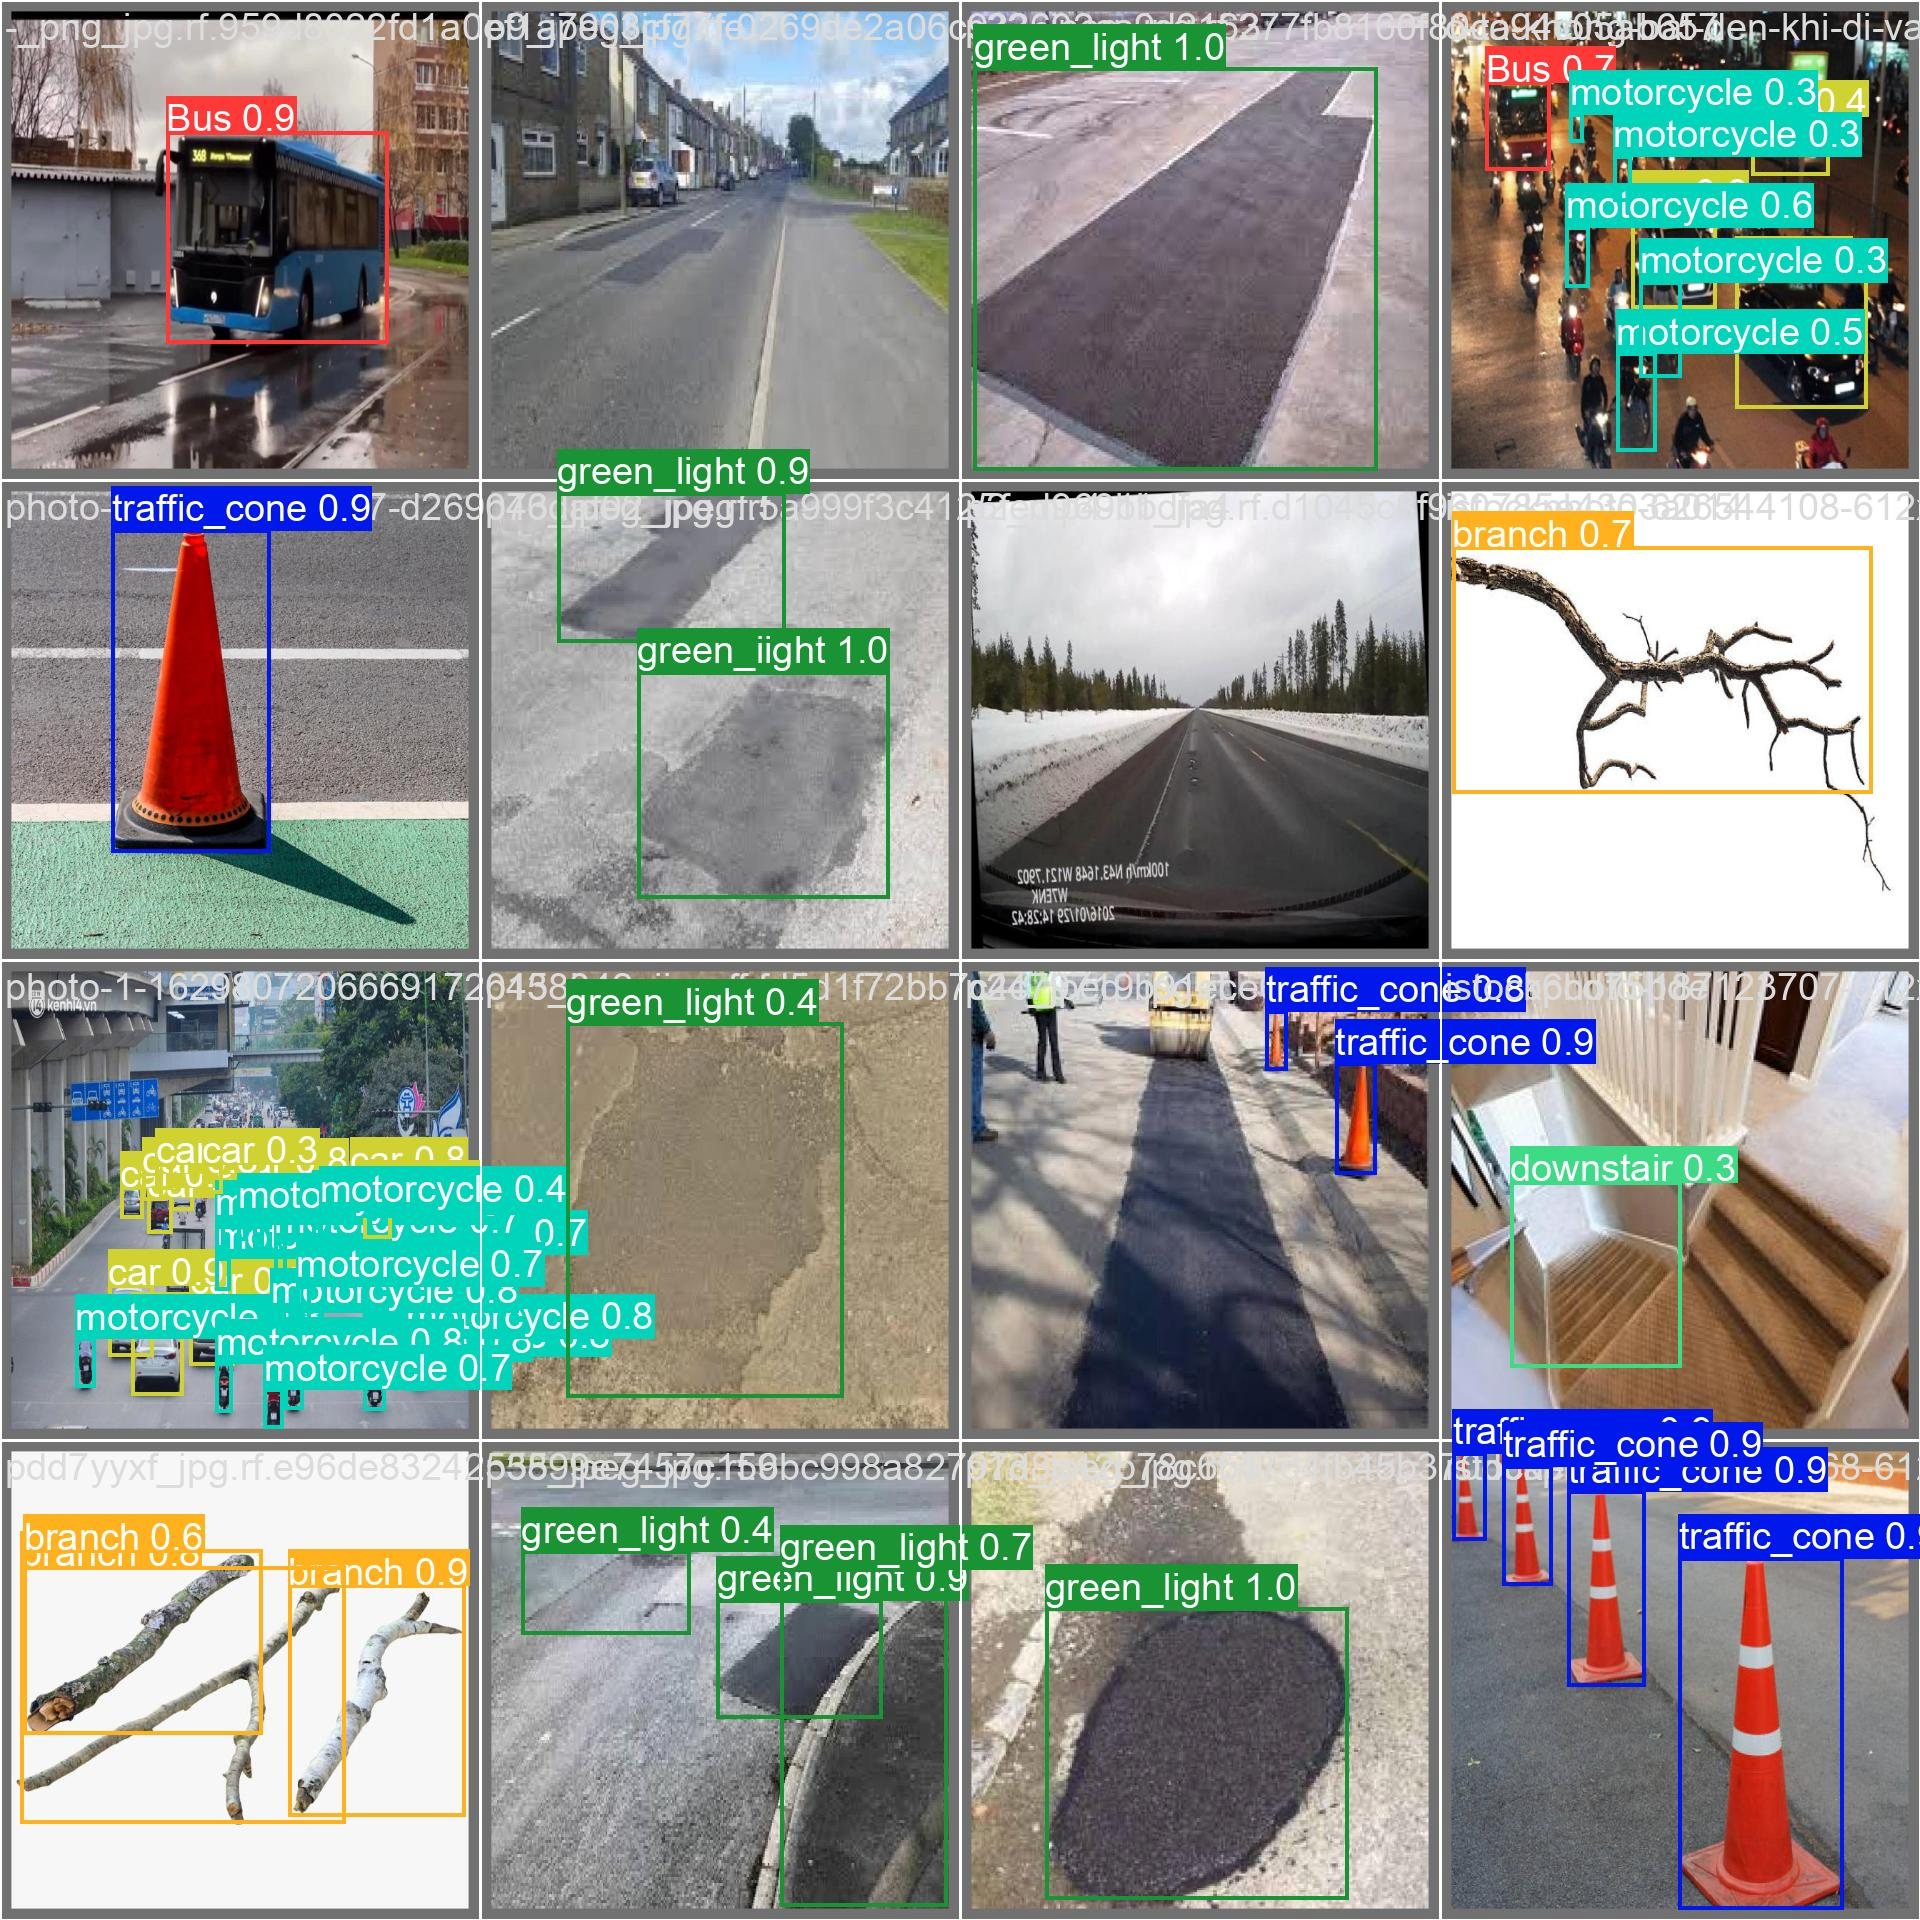

In [ ]:
import glob
from IPython.display import Image,display

for image_path in glob.glob(f'/content/runs/detect/train/val_batch0_pred.jpg'):
  display(Image(filename=image_path, height=1200))
  print("\n")

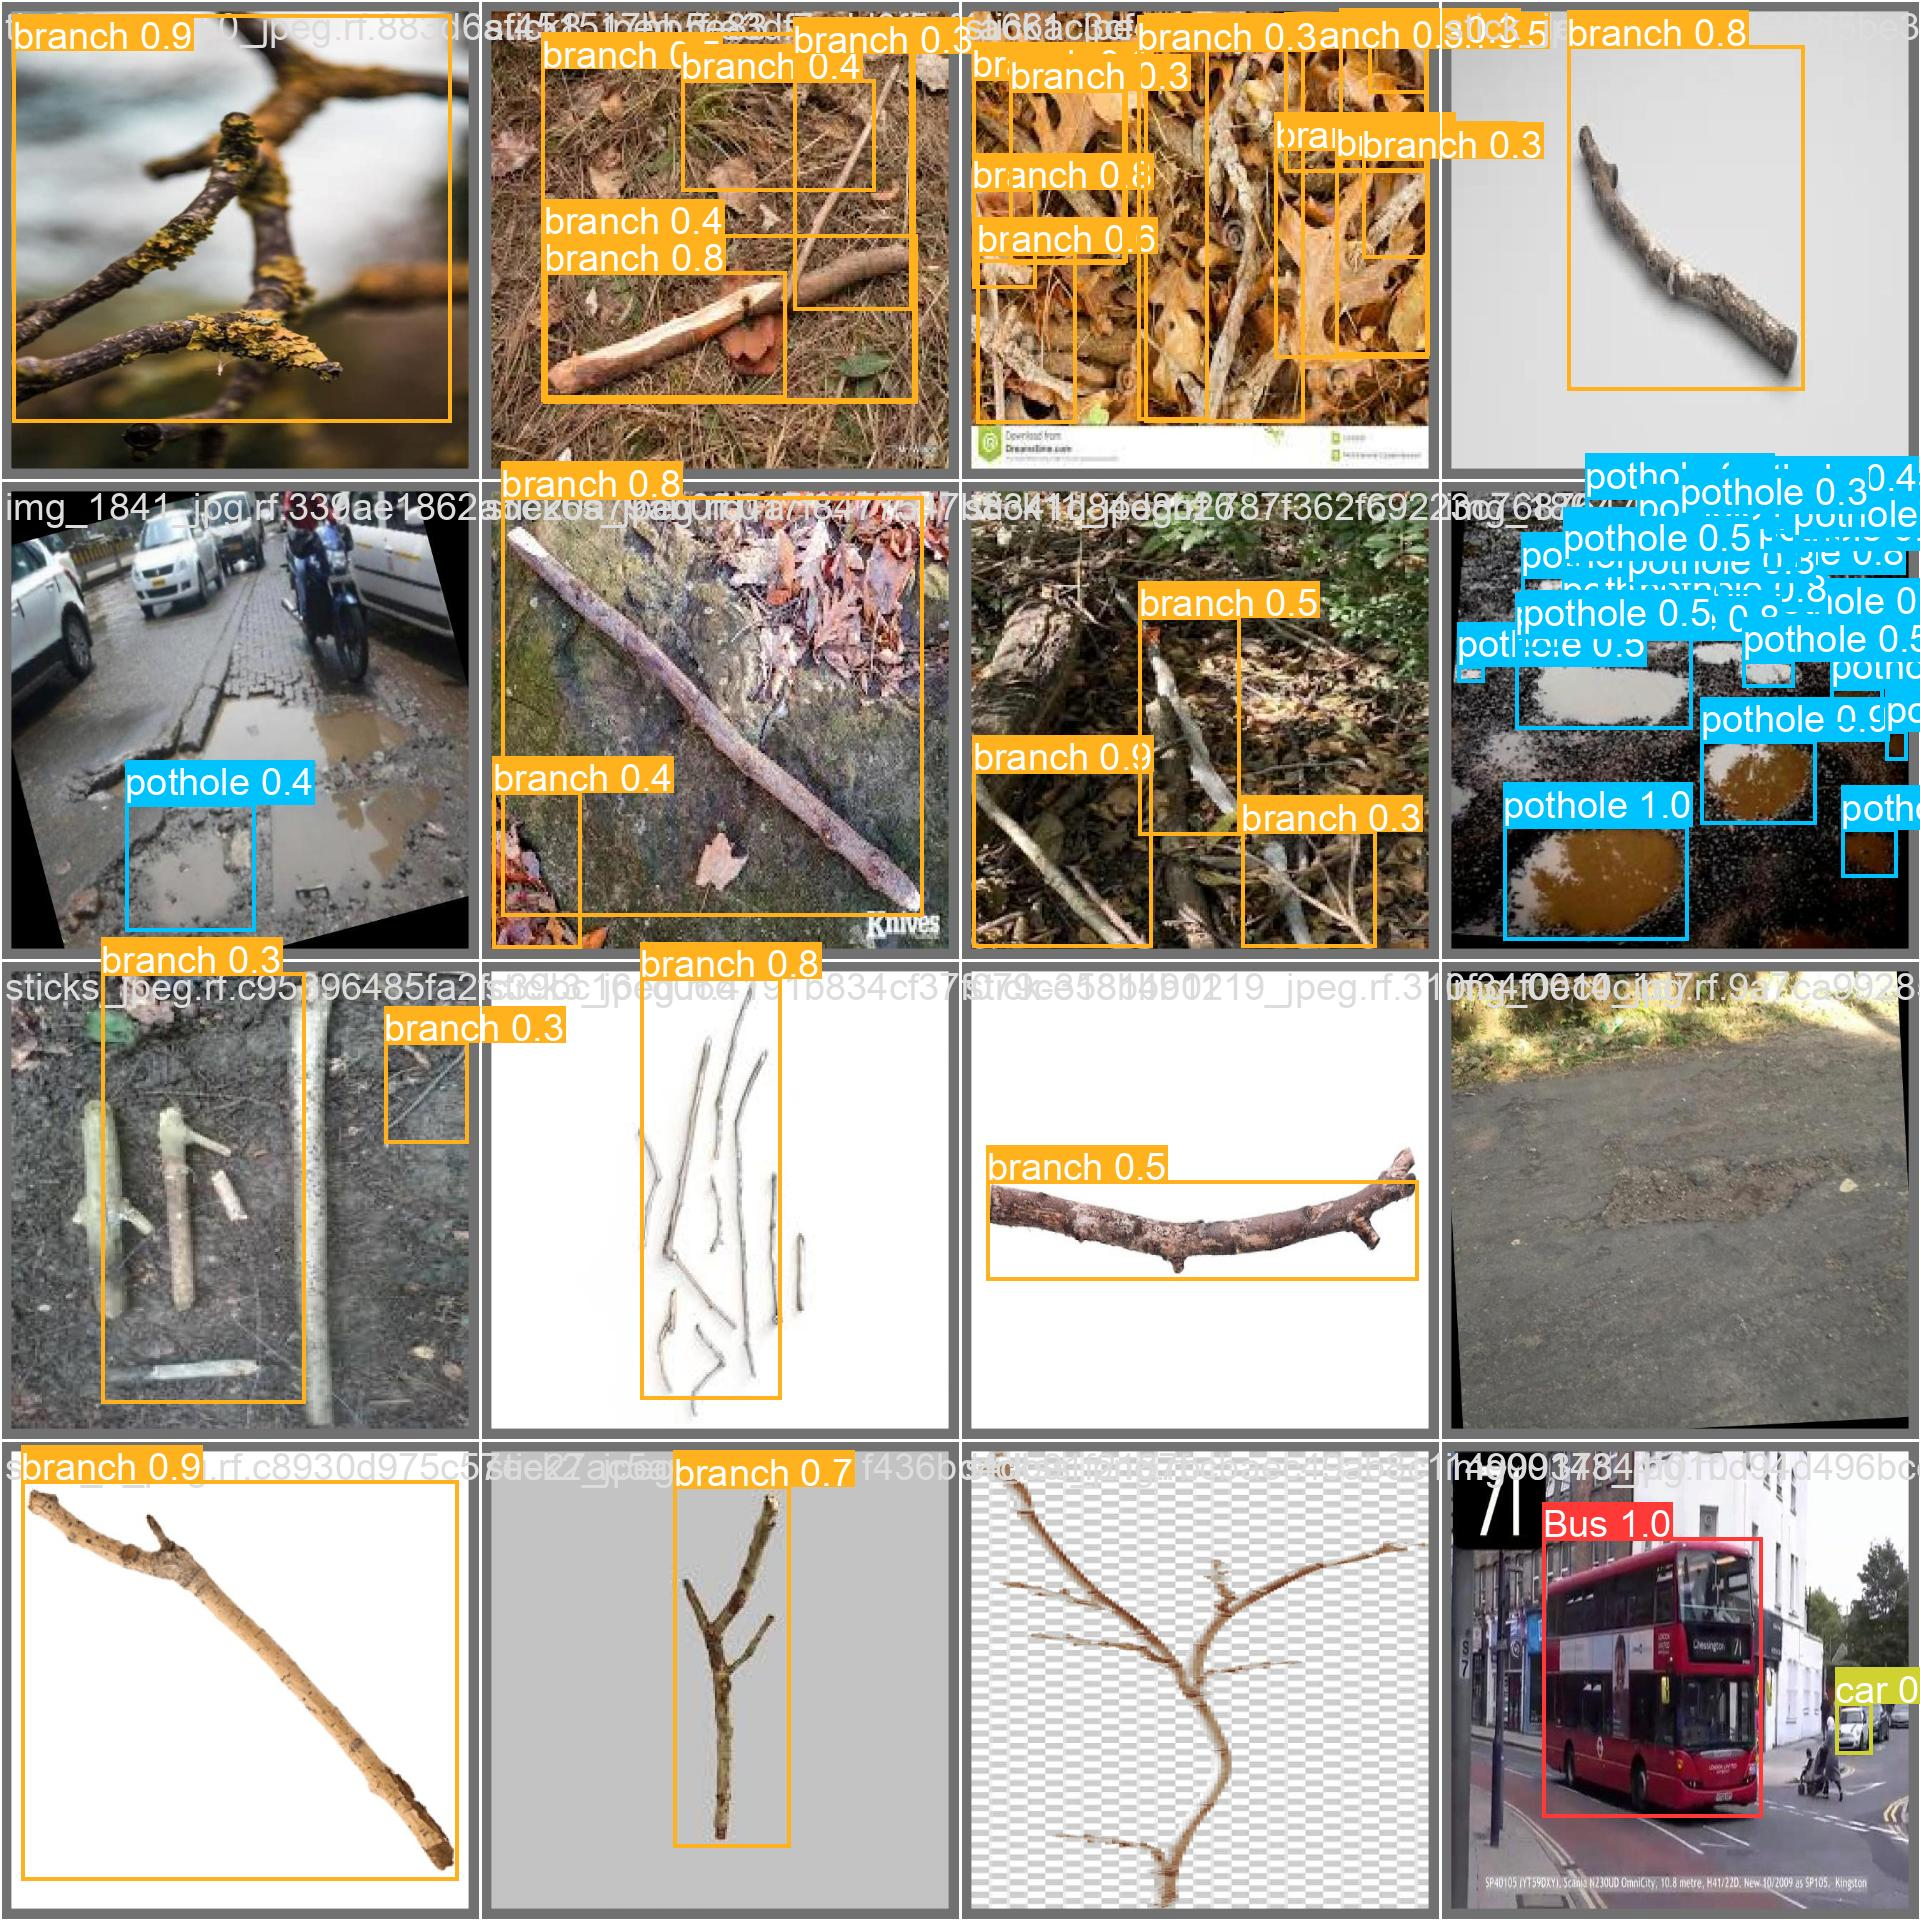

In [ ]:
import glob
from IPython.display import Image,display

for image_path in glob.glob(f'/content/runs/detect/train/val_batch1_pred.jpg'):
  display(Image(filename=image_path, height=1200))
  print("\n")

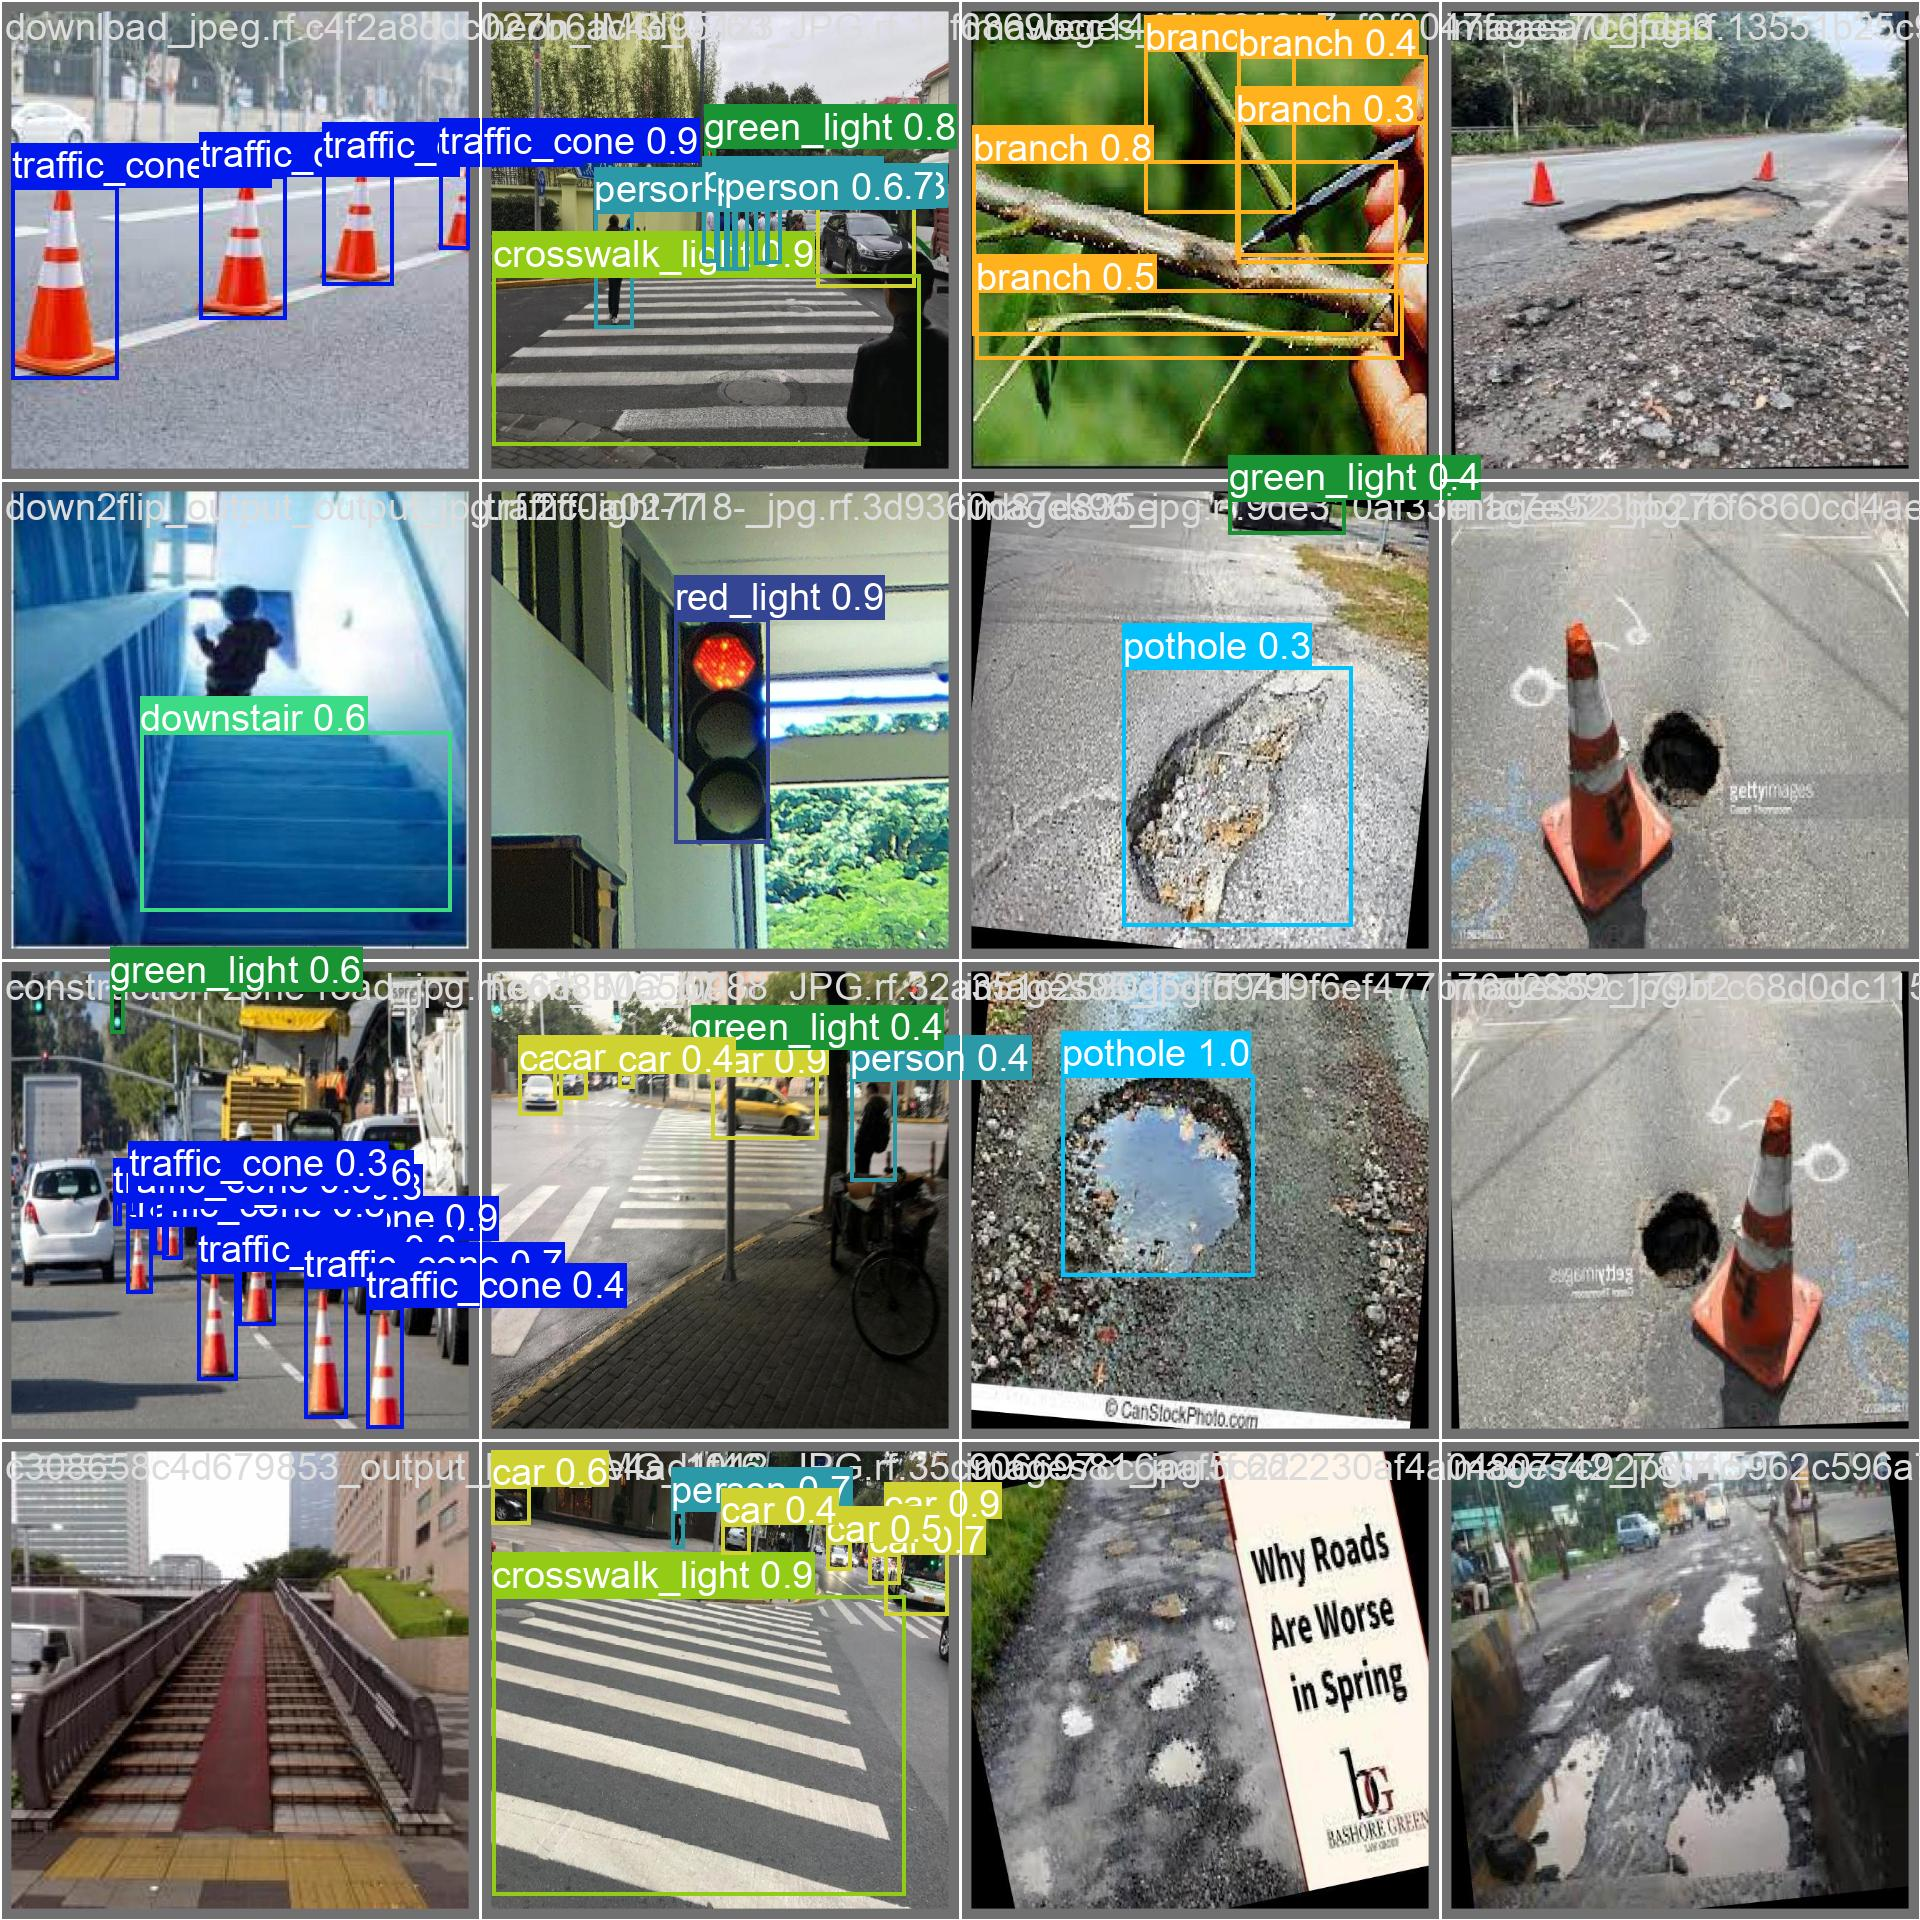

In [ ]:
import glob
from IPython.display import Image,display

for image_path in glob.glob(f'/content/runs/detect/train/val_batch2_pred.jpg'):
  display(Image(filename=image_path, height=1200))
  print("\n")